# Goal
- Predict final grade of students through linear regression on the data set

In [136]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

## Import csv 

In [39]:
df = pd.read_csv('student-mat.csv', delimiter=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Find linear relationships through pairwise plotting

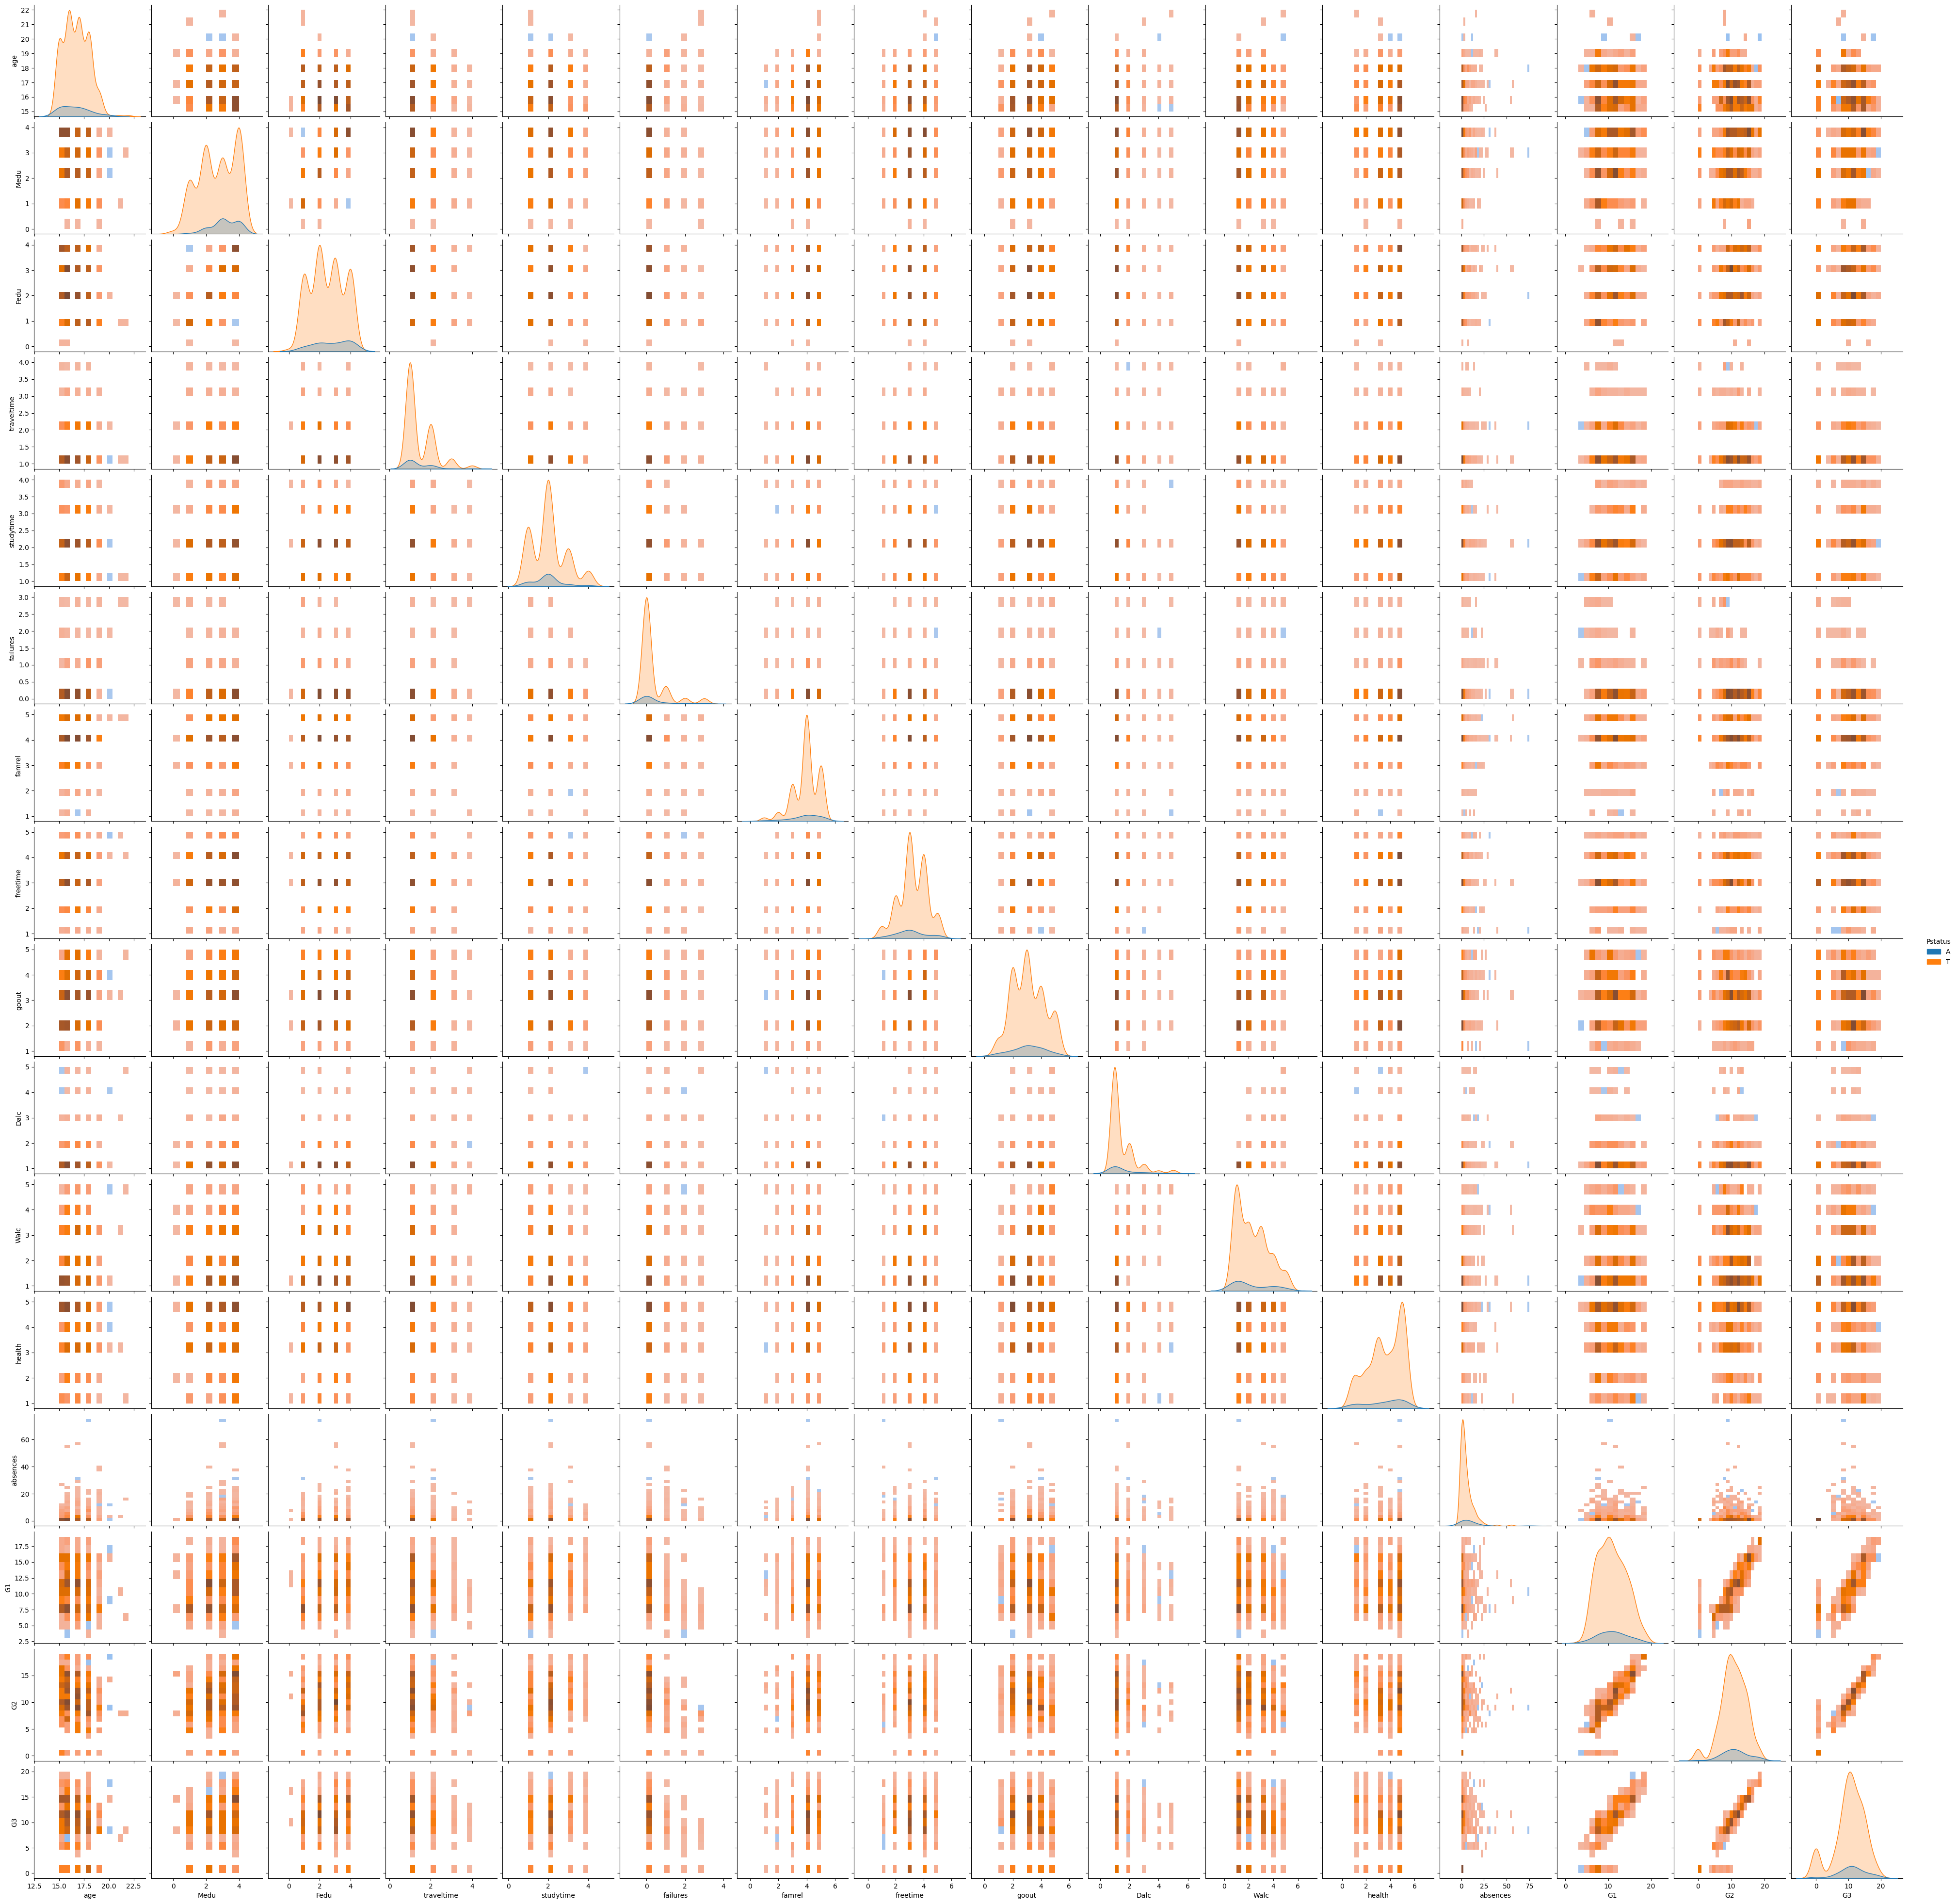

In [50]:
sb.pairplot(df, hue = 'Pstatus',diag_kind = "kde",kind = "hist")
plt.show()

In [109]:
Y = np.array(df['G3']) ## result data
## feature data (significant data points)
X = df[["G2", "G1", "studytime", "failures", "absences"]] 
X.head()

,G2,G1,studytime,failures,absences
0,6,5,2,0,6
1,5,5,2,0,4
2,8,7,2,3,10
3,14,15,3,0,2
4,10,6,2,0,4


In [110]:
#splits the data into training data and testing data (test data makes up last 10% of the data)
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.1)



Coefficients: 
 [ 0.98105357  0.14978217 -0.162785   -0.27924359  0.04061063]
Accuracy: 
, 0.8331060120694201
Error: 1.6221052539427798


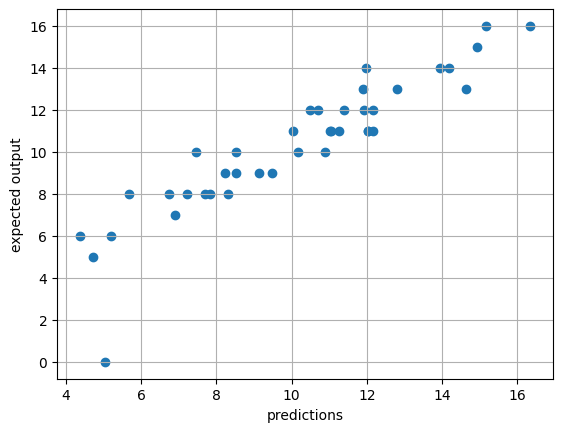

In [165]:

linear = LinearRegression()
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test) ##accuracy of model
predictions1 = linear.predict(x_test) # get predictions based on x_test
plt.scatter(predictions1, y_test)
plt.xlabel("predictions")
plt.ylabel("expected output")
plt.grid()
print("Coefficients: \n", linear.coef_) ## coefficients of variables
print("Accuracy: \n,", acc)
print("Error:", mean_squared_error(predictions1, y_test))


# Solving with just normal equation

Coefficients: 
 [ 0.97345526  0.07199282 -0.37397247 -0.50764074  0.0313556 ]
Accuracy: 
, 0.8117555259101044
Error: 1.564306271728706


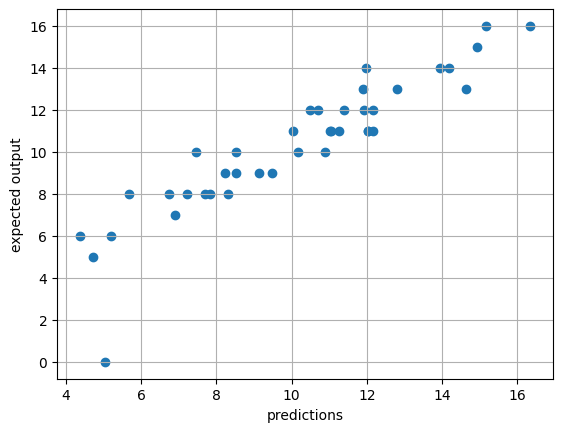

In [152]:
def solve_neq(X, y):
    C = X.T.dot(X) 
    b = X.T.dot(y)
    #solving augment matrix with Guassian elimination
    return sp.linalg.solve(C, b)
coefficients2 = solve_neq(x_train, y_train)
predictions2 = x_test.dot(coefficients2)
plt.scatter(predictions2, y_test)
plt.xlabel("predictions")
plt.ylabel("expected output")
plt.grid()
print("Coefficients: \n", coefficients2) ## coefficients of variables
print("Accuracy: \n,", r2_score(predictions2, y_test))
print("Error:", mean_squared_error(predictions2, y_test))


# Normal equation with QR Decomposition

Coefficients: 
 [ 0.97345526  0.07199282 -0.37397247 -0.50764074  0.0313556 ]
Accuracy: 
, 0.8117555259101044
Error: 1.564306271728706


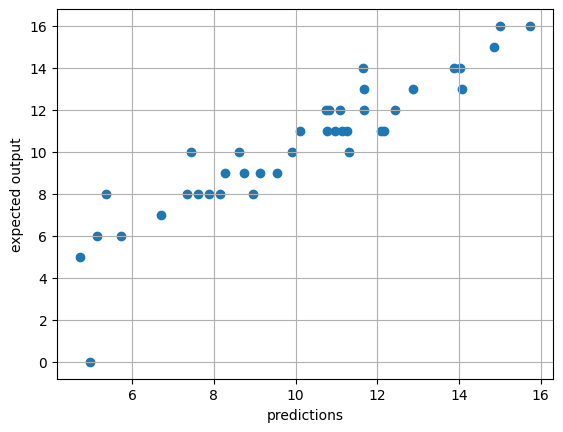

In [151]:
def solve_qr(X, y):
    Q, R = np.linalg.qr(X)
    b = Q.T.dot(y)
    return sp.linalg.solve(R, b)
coefficients3 = solve_neq(x_train, y_train)
predictions3 = x_test.dot(coefficients3)
plt.scatter(predictions3, y_test)
plt.xlabel("predictions")
plt.ylabel("expected output")
plt.grid()
print("Coefficients: \n", coefficients3) ## coefficients of variables
print("Accuracy: \n,", r2_score(predictions3, y_test))
print("Error:", mean_squared_error(predictions3, y_test))


# Improving the previous scikit model through iteration and shuffling

In [219]:
import pickle
best_acc = linear.score(x_test, y_test) ## current best r2_score
#save current to pickle
with open("studentmodel.pickle", "wb") as f:
        pickle.dump(linear, f)
        
while (best_acc < 0.97):
    #need to shuffle to get new training and testing samples
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.1, shuffle=True)
    linear = LinearRegression()
    linear.fit(x_train, y_train)    
    if linear.score(x_test, y_test) > best_acc:
         best_acc = linear.score(x_test, y_test)
         with open("studentmodel.pickle", "wb") as f:
                pickle.dump(linear, f)

loaded_model = open("studentmodel.pickle", "rb")
linear = pickle.load(loaded_model)

Coefficients: 
 [ 0.99671462  0.13570623 -0.22333598 -0.28982947  0.03626949]
Accuracy: 
, 0.9770507323191407
Error: 0.5861242965691454


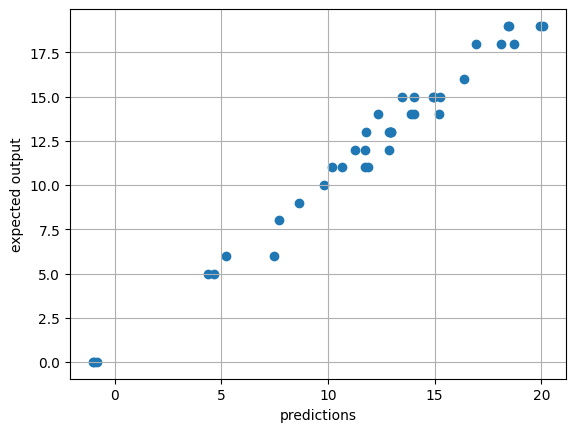

In [220]:

predictions1 = linear.predict(x_test) # get predictions based on x_test
plt.scatter(predictions1, y_test)
plt.xlabel("predictions")
plt.ylabel("expected output")
plt.grid()
print("Coefficients: \n", linear.coef_) ## coefficients of variables
print("Accuracy: \n,", linear.score(x_test, y_test))
print("Error:", mean_squared_error(predictions1, y_test))